#**Indian StartUp Funding Analysis - Exploratory Data Analysis**

##Project Overview

**Goal -** Analyze India's startup funding ecosystem through comprehensive **EDA
to extract** actionable business insights for investors,entrepreneurs and policymakers.

**DataSet -** Indian Unicorn Startups 2023 (102 comapnies with $1B+ valuations)

##Loading And First Look

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


###Load The DataSet

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv')

###Basic DataSet Information

In [79]:
df.shape

(102, 8)

In [80]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [81]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


##Data Quality Assessment

####Check DataTypes And Missing Values

In [82]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [83]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


####Check For Duplicates

In [84]:
df.duplicated().sum()

np.int64(0)

####Basic Statistics

In [85]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


**Key Insights To Discuss:**
*   DataSet contains of 102 Indian Union Startups
*   No missing values(no duplicates/clean dataset)
*   Mix of categorical and numerical data
*   Entry Dates span from 2011 to 2022



##Data Preprocessing

###Clean column names

In [86]:
df.columns = df.columns.str.strip()

####Convert Entry Coulmn To Datetime

In [87]:
df['Entry_Date'] = pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_Year'] = df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [88]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


####Create Valuation Growth Metric

In [89]:
df['Valuation_Growth'] = df['Valuation ($B)'] / df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


####Extact Primary City (Before'/')

In [90]:
df['Primary_City'] = df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


####Count Number Of Investors

In [91]:
df['Investor_Count'] = df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


####Univariate Analysis

####Valuation Distribution Analysis

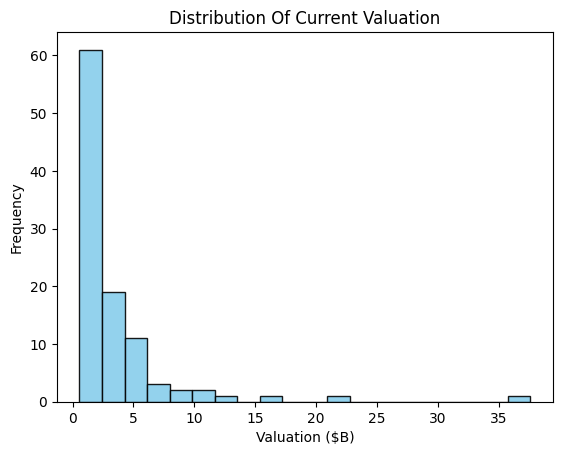

In [92]:
plt.hist(df['Valuation ($B)'],bins=20,alpha=0.9,color='skyblue',edgecolor='black')
plt.title('Distribution Of Current Valuation')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

**Key Insights:**
*   Highly right-skewed distribution(few mega-unicorns)
*   Median valuation around 2-3B -*FLIPKART dominates with* 37.6B valuation
*   Most unicorn clustered in$1-5B range

##Sector Analysis

####Sector Distribution

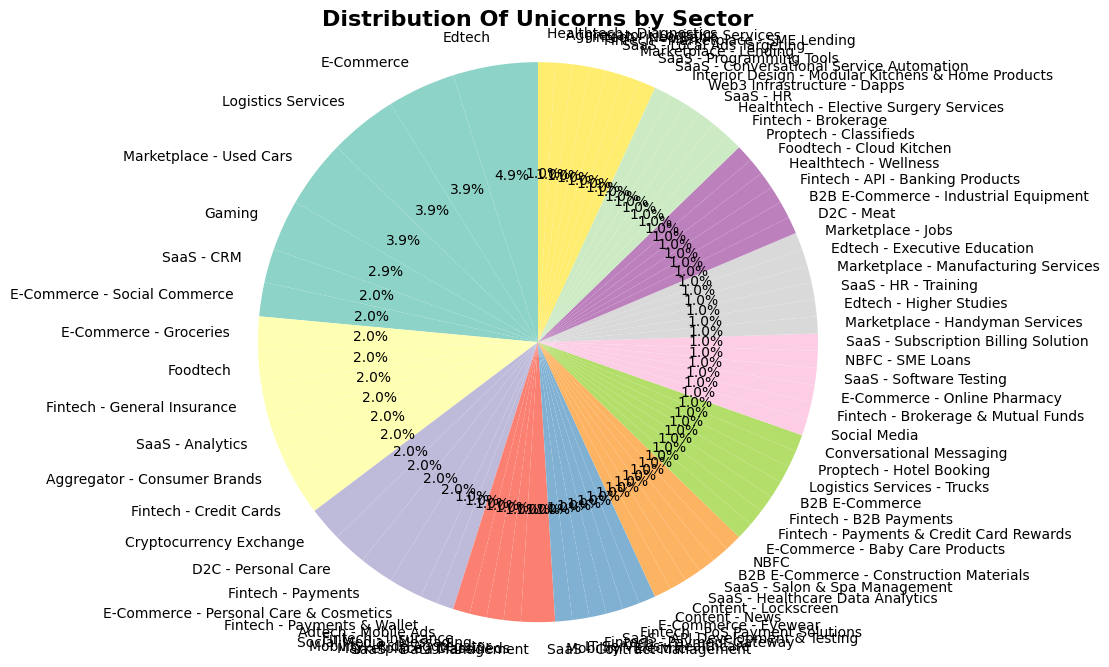

In [93]:
plt.figure(figsize=(12,8))

sector_counts = df['Sector'].value_counts()
colors = plt.cm.Set3(np.linspace(0,1,len(sector_counts)))

plt.pie(sector_counts.values,labels=sector_counts.index,autopct='%1.1f%%',colors=colors,startangle=90)
plt.title('Distribution Of Unicorns by Sector',fontsize=16,fontweight='bold')
plt.axis('equal')
plt.show()

####Top 10 Sectors

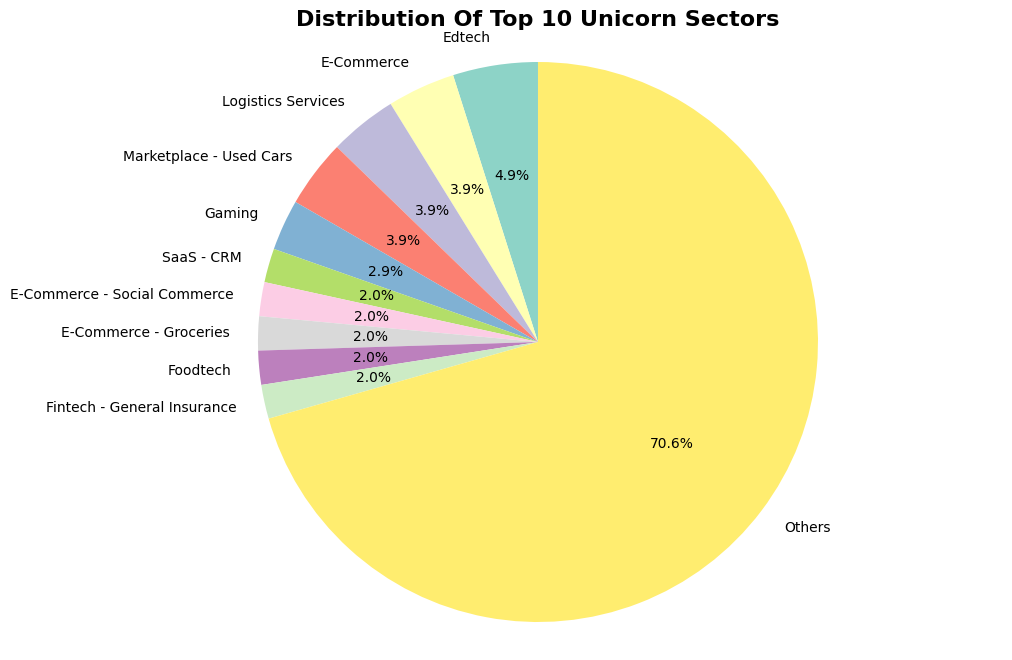

In [94]:
def display_top_k_sectors(df,k):
  sector_counts = df['Sector'].value_counts()

  #Select top K sectors and group the rest as'Others'
  if k < len(sector_counts):
    top_sectors = sector_counts.head(k)
    other_sectors_count= sector_counts.iloc[k:].sum()
    top_sectors['Others'] = other_sectors_count
  else:
    top_sectors =sector_counts

  plt.figure(figsize=(12,8))
  colors = plt.cm.Set3(np.linspace(0,1,len(top_sectors)))


  plt.pie(top_sectors.values,labels=top_sectors.index,autopct='%1.1f%%',colors=colors,startangle=90)
  plt.title(f'Distribution Of Top {k} Unicorn Sectors',fontsize=16,fontweight='bold')
  plt.axis('equal')
  plt.show()

#Call the function K=5 to display top 5 sectors
display_top_k_sectors(df,10)



####Top Sectors By Bar Chart

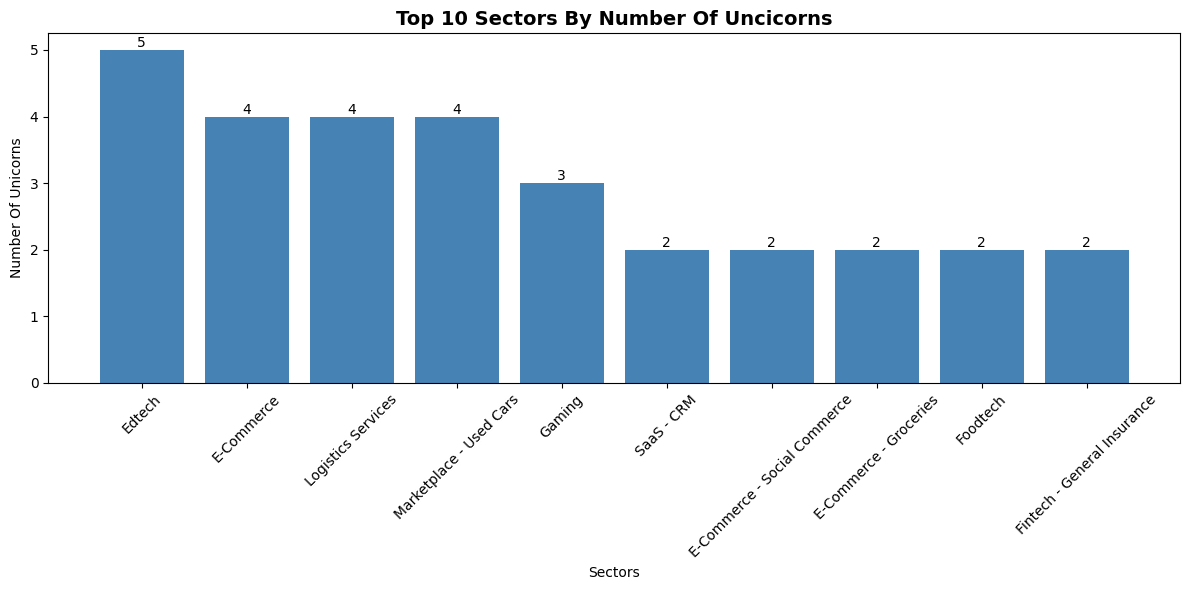

In [95]:
plt.figure(figsize=(12,6))
top_sectors = sector_counts.head(10)
bars = plt.bar(range(len(top_sectors)), top_sectors.values,color='steelblue')
plt.title('Top 10 Sectors By Number Of Uncicorns',fontsize=14,fontweight='bold')
plt.xlabel('Sectors')
plt.ylabel('Number Of Unicorns')
plt.xticks(range(len(top_sectors)),top_sectors.index,rotation=45,ha='center')

#Add value labels on bars
for bar,value in zip(bars,top_sectors.values):
  plt.text(bar.get_x() + bar.get_width()/2,bar.get_height() + 0.0, #(0.1)
           str(value),ha='center',va='bottom')

plt.tight_layout()
plt.show()

**Key Insights:**


*   EdTech leads with highest number of unicorns
*   E-commerec and SaaS  are major contributions
*   EdTech emergence asa significant sector
*   Diversification across multiple sectors

## Geographic Distribution

####City - Wise Distribution

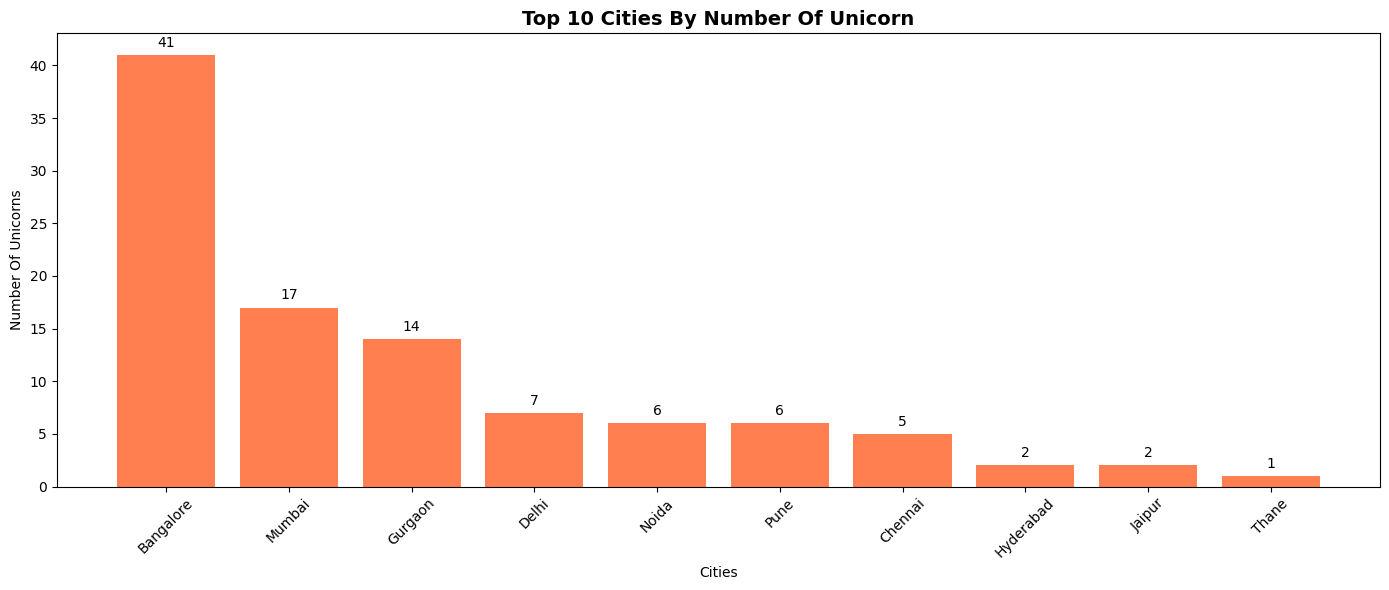

In [96]:
plt.figure(figsize=(14,6))

city_counts = df['Primary_City'].value_counts().head(10)
bars = plt.bar(city_counts.index,city_counts.values,color='coral')
plt.title('Top 10 Cities By Number Of Unicorn',fontsize=14,fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('Number Of Unicorns')
plt.xticks(rotation=45)

#Add value labels on bars
for bar,value in zip(bars,city_counts.values):
  plt.text(bar.get_x() + bar.get_width()/2,bar.get_height() + 0.5,
           str(value),ha='center',va='bottom')

plt.tight_layout()
plt.show()

####Create a summary table

In [97]:
city_summary = df.groupby('Primary_City').agg({
    'Valuation ($B)': ['count','sum','mean'],
    'Entry_Year':['min','max'],
}).round(2)
city_summary.columns = ['Count','Total Valuation','Avg_Valuation','First_Entry','Last_Entry']
city_summary.head(10)

,Count,Total Valuation,Avg_Valuation,First_Entry,Last_Entry
Primary_City,,,,,
Bangalore,41,185.20,4.52,2011,2022
Chennai,5,12.20,2.44,2018,2022
Delhi,7,15.53,2.22,2014,2022
Goa,1,1.53,1.53,2022,2022
Gurgaon,14,37.94,2.71,2015,2022
Hyderabad,2,2.50,1.25,2020,2022
Jaipur,2,2.90,1.45,2021,2022
Mumbai,17,42.80,2.52,2018,2022
Noida,6,30.90,5.15,2015,2022


**Key Insights:**
*  Bangalore dominates with highest number of unicorns
*  Mumbai and Gurgoan are other major hubs
*  Geographic concentration in tech cities
*  Bangalore leads in both count and total valuation





###Temporal Analysis

####Entry Year Trends

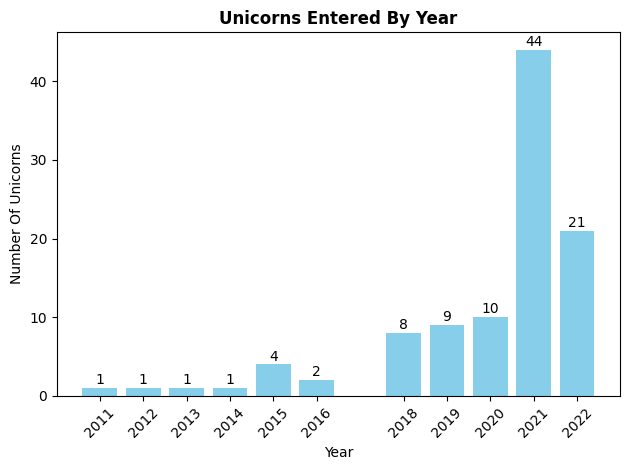

In [108]:
yearly_entries = df['Entry_Year'].value_counts().sort_index()
bars= plt.bar(yearly_entries.index,yearly_entries.values,color='skyblue')
plt.title('Unicorns Entered By Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number Of Unicorns')
plt.xticks(yearly_entries.index,rotation=45)

#Add value labels
for bar,value in zip(bars,yearly_entries.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.1,
           str(value),ha='center',va='bottom')

plt.tight_layout()
plt.show()


####Cummulative Unicorn

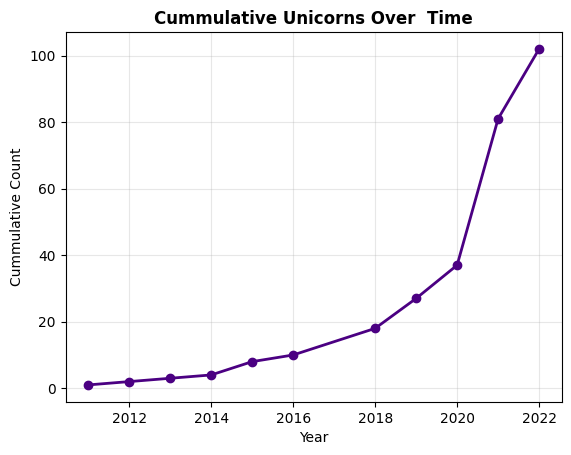

In [114]:
cummulative = yearly_entries.cumsum()
plt.plot(cummulative.index,cummulative.values,marker='o',linewidth=2,markersize=6,color='indigo')
plt.title('Cummulative Unicorns Over  Time',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cummulative Count')
plt.grid(True,alpha=0.3)
plt.show()

####Avearge Valuation By Year

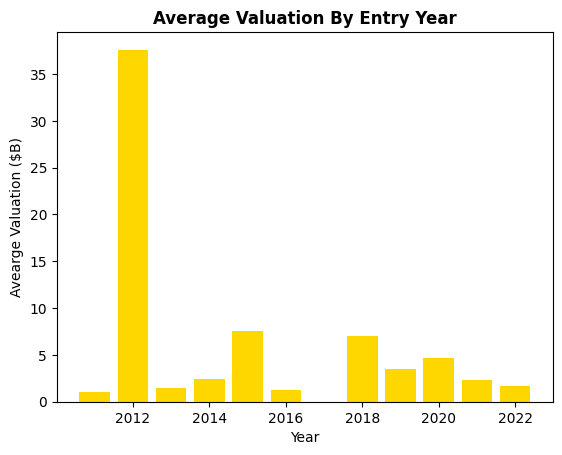

In [123]:
avg_val_by_year = df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='gold')
plt.title('Average Valuation By Entry Year',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Avearge Valuation ($B)')
plt.show()


####Sector Evolution Over Time

In [141]:
def display_k_sector_evolution(df,k):
  #Group By Year And Sector,Count Occurances
  sector_year = df.groupby(['Entry_Year','Sector']).size().unstack(fill_value=0)

  #Select top k sectors based on overall count
  top_k_sectors_names = df['Sector'].value_counts().head(k).index.tolist()

  sector_year = sector_year[top_k_sectors_names]

  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',alpha=0.7,ax=plt.gca())

  plt.title(f'Evolution Of Top {k} Sectors Over Time',fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number Of Unicorns')
  plt.legend(title='Sector',bbox_to_anchor=(1.05,1),loc='upper left')
  plt.yticks(range(0,sector_year.values.max()+5))
  plt.grid(True,alpha=0.3)
  plt.tight_layout()
  plt.show()

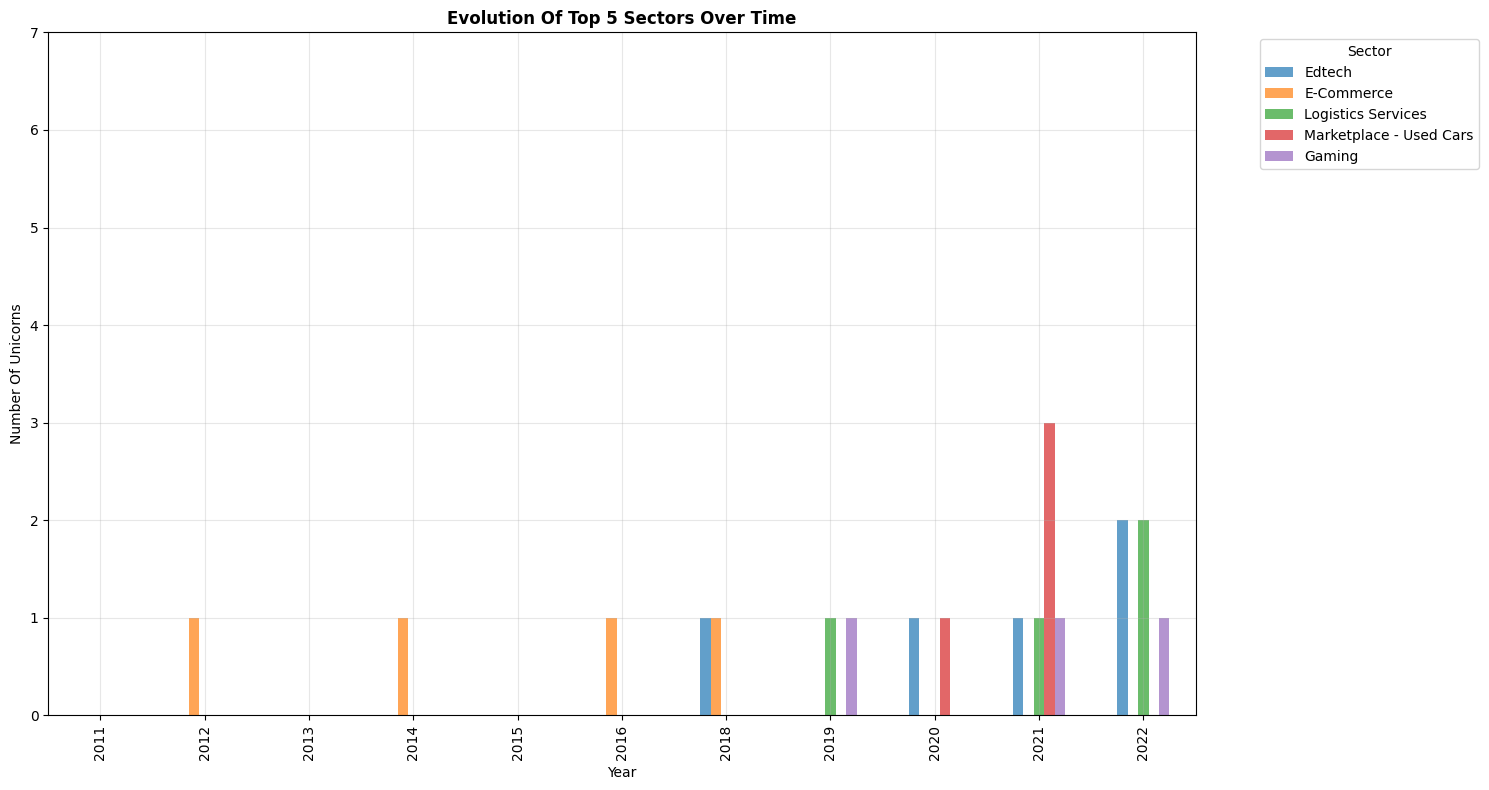

In [142]:
#Call the function with k=5
display_k_sector_evolution(df,5)
